In [143]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
data = pd.read_csv("/content/drive/MyDrive/Cluster Analysis and Unsupervised Machine Learning with Python and Tableau/Credit Card Customer Segmentation/data-JA-54654-9-3.csv")

In [145]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [146]:
data.shape

(2000, 8)

In [147]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [149]:
data.drop('ID', axis = 1, inplace = True)

## **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


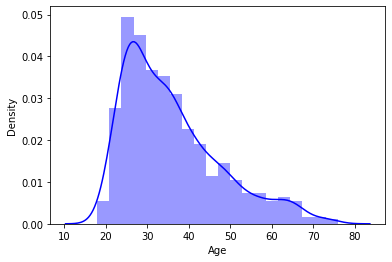

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


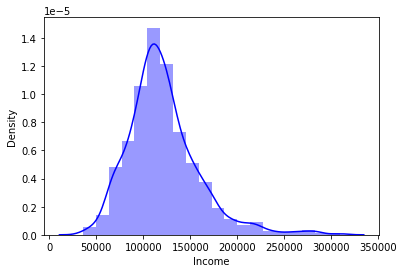

In [150]:
n_cols = ['Age', 'Income']

for i in n_cols:
  sns.distplot(data[i], bins = 20, color='blue')
  plt.show()

In [151]:
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

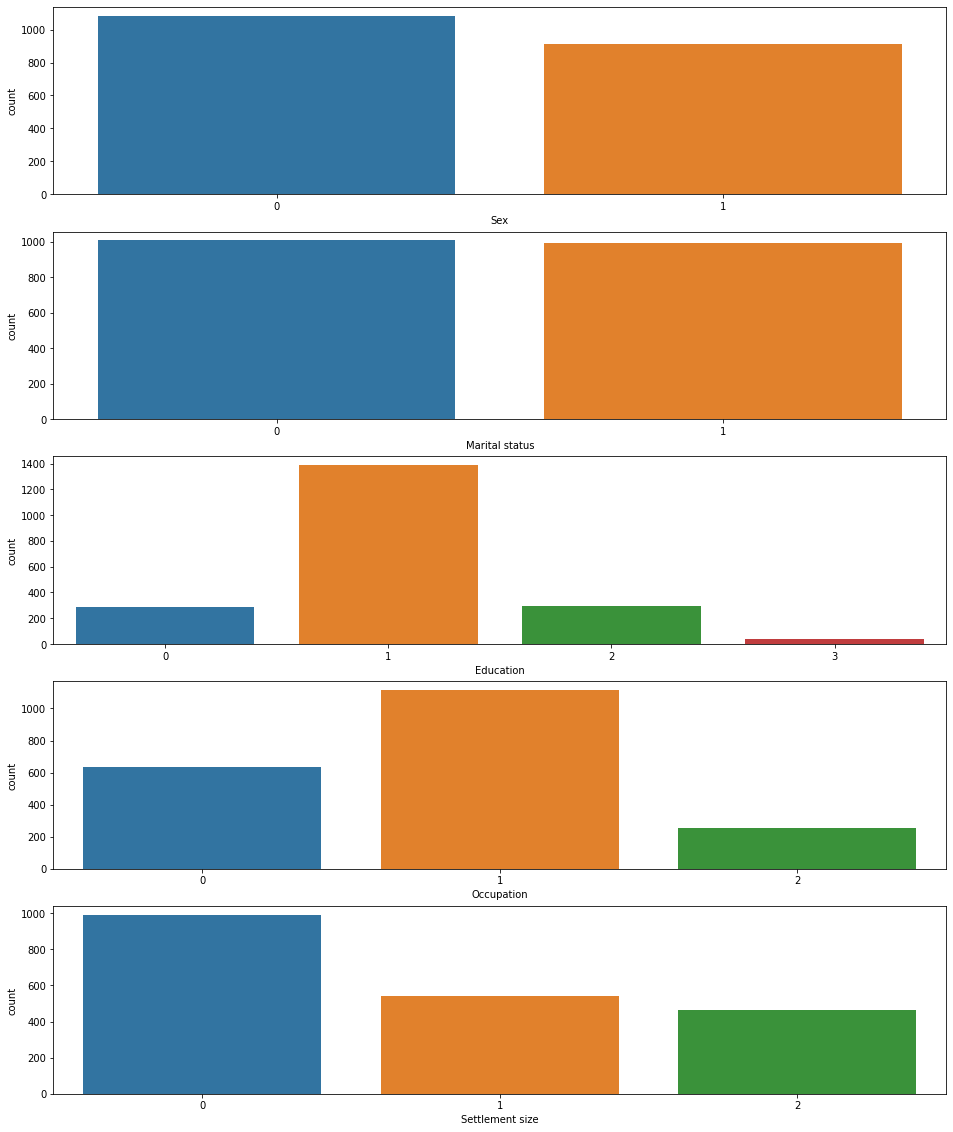

In [152]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 20))

cols_ = ['Sex', 'Marital status', 'Education', 'Occupation',
       'Settlement size']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

Text(0.5, 0.98, 'Sex vs Occupation')

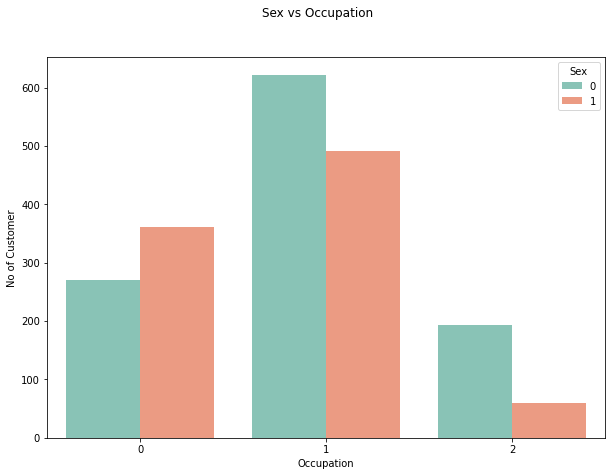

In [153]:
# Relation between Sex and Occupation

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="Occupation", hue="Sex", data=data, palette= ["#7fcdbb","#fc9272"],ax=ax)


ax.set_xlabel("Occupation")
ax.set_ylabel("No of Customer")
fig.suptitle("Sex vs Occupation")

Text(0.5, 0.98, 'Settlement size vs Occupation')

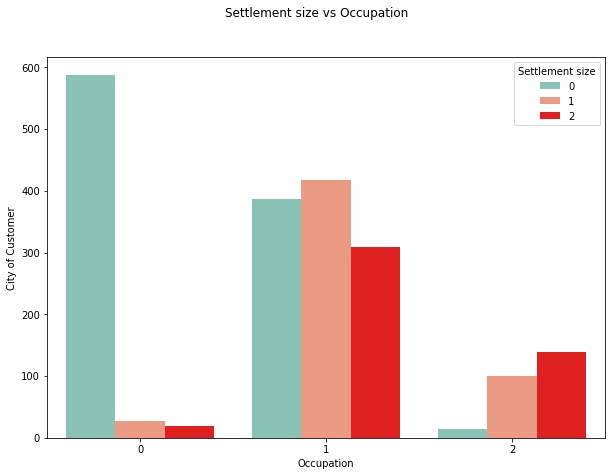

In [154]:
# Relation between City and Occupation

fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="Occupation", hue="Settlement size", data=data, palette= ["#7fcdbb","#fc9272", "red"],ax=ax)


ax.set_xlabel("Occupation")
ax.set_ylabel("City of Customer")
fig.suptitle("Settlement size vs Occupation")

In [155]:
c_cols = data[['Age', 'Income']]

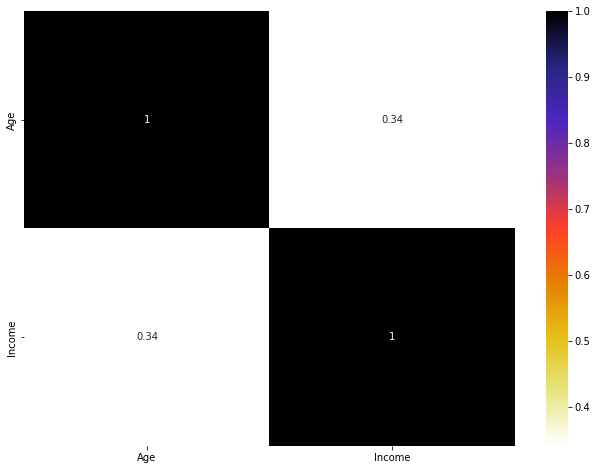

In [156]:
 # Displaying Correlation between continous varaibles using heatmap

plt.figure(figsize=(11,8))
cor = c_cols.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


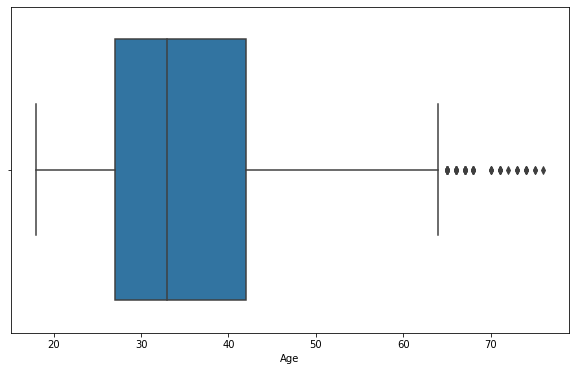

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


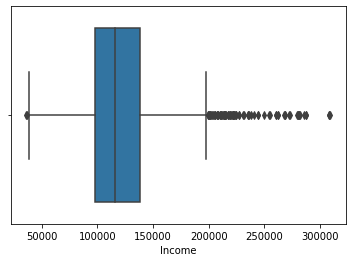

In [157]:
plt.figure(figsize = (10, 6))

for i in c_cols.columns:
    sns.boxplot(data[i])
    plt.show()

In [158]:
data.shape

(2000, 7)

In [159]:
df1=data.copy()

In [141]:
# Outlier Treatment for Age

Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)

IQR = Q3 - Q1
data = data[(data.Age >= Q1 - 1.5*IQR) & (data.Age <= Q3 + 1.5*IQR)]

In [105]:
# Outlier Treatment for ApplicantIncome

m = data['Income'].mean()
s = data['Income'].std()
#Q1 = data.Income.quantile(0.25)
#Q3 = data.Income.quantile(0.75)

#IQR = Q3 - Q1
data = data[(data.Income >= m - 3*s) & (data.Income <= m + 3*s)]

In [106]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,0.462382,0.501567,34.811912,0.993730,117761.277429,0.786834,0.718391
std,0.498713,0.500128,10.349771,0.551539,32798.525425,0.622386,0.808738
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.000000,97033.250000,0.000000,0.000000
50%,0.000000,1.000000,33.000000,1.000000,114429.500000,1.000000,0.000000
75%,1.000000,1.000000,41.000000,1.000000,135716.750000,1.000000,1.000000
max,1.000000,1.000000,64.000000,3.000000,230883.000000,2.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


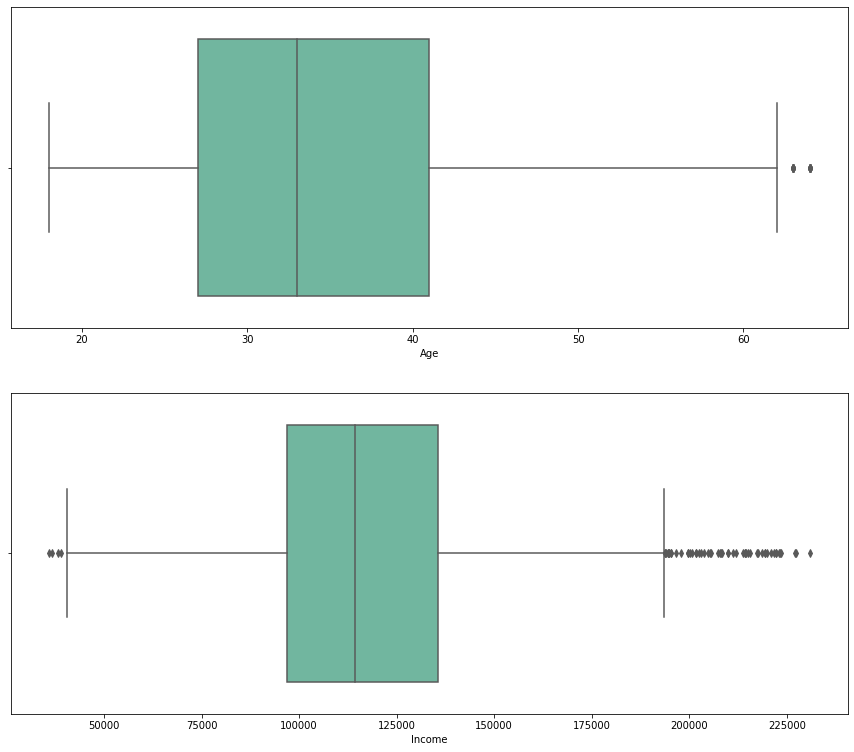

In [107]:
## Visualize the boxplot after treatment

fig, axs = plt.subplots(2,1, figsize = (15, 13))
plt1 = sns.boxplot(data['Age'], ax = axs[0], palette = 'BuGn')
plt1 = sns.boxplot(data['Income'], ax = axs[1], palette = 'BuGn')
#plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2], palette = 'BuGn')

plt.show()

In [108]:
data.shape

(1914, 7)

In [109]:
# Make  copy of  original data set
df=data.copy()

In [110]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled, columns=['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation','Settlement size'])

In [111]:
data_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.078291,0.99687,-1.238217,0.01137,1.006763,0.342588,1.585116
1,-0.927393,-1.00314,1.371218,0.01137,-0.870732,-1.264552,-0.888518
2,-0.927393,-1.00314,0.984635,0.01137,1.640860,0.342588,0.348299
3,-0.927393,-1.00314,1.757801,0.01137,0.953637,0.342588,0.348299
4,-0.927393,-1.00314,0.018178,0.01137,0.826068,-1.264552,-0.888518


In [51]:
X_std = data_scaled

In [ ]:
X_std

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.078291,0.99687,-1.238217,0.011370,1.006763,0.342588,1.585116
1,-0.927393,-1.00314,1.371218,0.011370,-0.870732,-1.264552,-0.888518
2,-0.927393,-1.00314,0.984635,0.011370,1.640860,0.342588,0.348299
3,-0.927393,-1.00314,1.757801,0.011370,0.953637,0.342588,0.348299
4,-0.927393,-1.00314,0.018178,0.011370,0.826068,-1.264552,-0.888518
...,...,...,...,...,...,...,...
1909,1.078291,-1.00314,1.177927,0.011370,0.175777,-1.264552,-0.888518
1910,1.078291,0.99687,-0.754988,0.011370,-0.000527,0.342588,-0.888518
1911,-0.927393,-1.00314,-0.368405,-1.802213,-0.956429,-1.264552,-0.888518
1912,1.078291,0.99687,-1.044925,0.011370,-0.603638,-1.264552,-0.888518


In [ ]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00052274,  0.55591777, -0.19409847,  0.26914774, -0.20553124,
        -0.20447194, -0.29925639],
       [ 0.55591777,  1.00052274, -0.22678121,  0.41527532, -0.06479408,
        -0.02076858, -0.09394834],
       [-0.19409847, -0.22678121,  1.00052274,  0.58077571,  0.2946752 ,
         0.06059149,  0.0967025 ],
       [ 0.26914774,  0.41527532,  0.58077571,  1.00052274,  0.18705859,
         0.02809858,  0.01128065],
       [-0.20553124, -0.06479408,  0.2946752 ,  0.18705859,  1.00052274,
         0.67453916,  0.49851531],
       [-0.20447194, -0.02076858,  0.06059149,  0.02809858,  0.67453916,
         1.00052274,  0.56639963],
       [-0.29925639, -0.09394834,  0.0967025 ,  0.01128065,  0.49851531,
         0.56639963,  1.00052274]])

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
print('Eigenvectors \n', eig_vecs)
print('Eigenvalues \n', eig_vals)

Eigenvectors 
 [[-0.35541954 -0.41879766 -0.277417    0.33101024 -0.71210981  0.0487626
  -0.04774229]
 [-0.22388653 -0.51389925 -0.41131336 -0.27264334  0.46989754  0.45284113
   0.1280645 ]
 [ 0.26506409 -0.29756944  0.66429112  0.03541506 -0.15132654  0.60424908
  -0.10314969]
 [ 0.05683416 -0.65412326  0.29336353 -0.18057892  0.12168578 -0.64893208
  -0.11958872]
 [ 0.52052775 -0.18972202 -0.13820475  0.47472977  0.07743194 -0.0652436
   0.66206878]
 [ 0.49756728 -0.08947854 -0.37211455  0.2856088   0.1325226   0.04189053
  -0.71067694]
 [ 0.48118639 -0.00950838 -0.26257664 -0.68941577 -0.45916317  0.01777011
   0.11393879]]
Eigenvalues 
 [2.44483166 1.8215604  1.34500794 0.52711623 0.41389443 0.16640705
 0.28484146]


In [ ]:
tot = sum(eig_vals)
tot

7.00365917407214

In [ ]:
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]

cum_sum_exp = np.cumsum(var_exp)
cum_sum_exp

array([ 34.90791881,  60.91661452,  80.12097482,  87.64727232,
        93.55696073,  97.62399843, 100.        ])

In [ ]:
sum(var_exp[0:4])

87.64727232209702

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)                      # to make clusters we need only 2 or max 3 features.
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components ,columns=["Principal Component 1","Principal Component 2"])
pca_df

,Principal Component 1,Principal Component 2
0,0.523253,0.839590
1,-0.591673,-0.775228
2,2.008011,-0.258195
3,1.855231,-0.158505
4,-0.067083,-0.855931
...,...,...
1909,-0.811029,0.205776
1910,-1.063262,0.768759
1911,-1.200465,-2.495453
1912,-2.253710,0.424254


## Build the Model

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

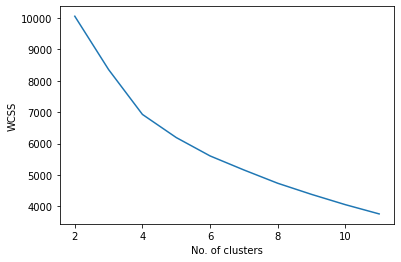

In [ ]:
plt.plot(range(2,12), wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = []
cluster_list = list(range(4, 8))
for x in cluster_list:
  clusters = KMeans(n_clusters= x, init = 'k-means++')
  pred =  clusters.fit_predict((data_scaled))
  score = silhouette_score(data_scaled, pred)
  sil_score.append(score)

In [ ]:
sil_score

[0.2698537110203934,
 0.25631514440119213,
 0.2650481506921537,
 0.2820506524026599]

In [ ]:
# Let's build the model with 4 clusters

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(data_scaled)

In [ ]:
y_pred

array([1, 3, 0, ..., 3, 1, 3], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 3, 0, ..., 3, 1, 3], dtype=int32)

In [ ]:
data_scaled['Clusters'] = y_pred

In [ ]:
data_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
0,1.078291,0.99687,-1.238217,0.01137,1.006763,0.342588,1.585116,1
1,-0.927393,-1.00314,1.371218,0.01137,-0.870732,-1.264552,-0.888518,3
2,-0.927393,-1.00314,0.984635,0.01137,1.640860,0.342588,0.348299,0
3,-0.927393,-1.00314,1.757801,0.01137,0.953637,0.342588,0.348299,0
4,-0.927393,-1.00314,0.018178,0.01137,0.826068,-1.264552,-0.888518,3


In [ ]:
data_scaled['Clusters'].unique()

array([1, 3, 0, 2], dtype=int32)

In [ ]:
data_scaled.groupby(by = 'Clusters').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Clusters,,,,,,,
0,-0.874239,-0.656848,0.103383,-0.450036,0.669305,0.751471,0.957967
1,-0.292406,-0.832833,-0.054201,-0.535080,-0.719401,-0.780305,-0.826407
2,0.864854,0.965571,-0.680122,0.022723,-0.300957,-0.125218,-0.307853
3,0.303186,0.542685,1.597238,1.933335,0.569606,0.048052,0.131486


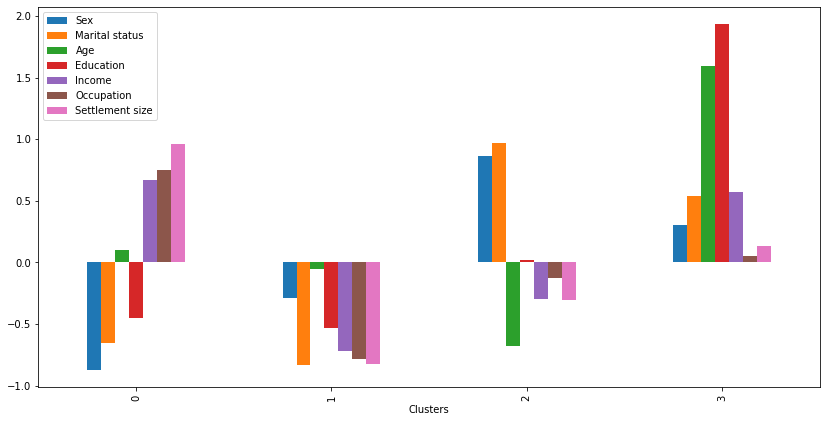

In [ ]:
data_scaled.groupby(by = 'Clusters').mean().plot.bar(figsize = (14, 7))



In [ ]:
df['Clusters'] = data_scaled['Clusters'] 

<Figure size 1008x504 with 0 Axes>

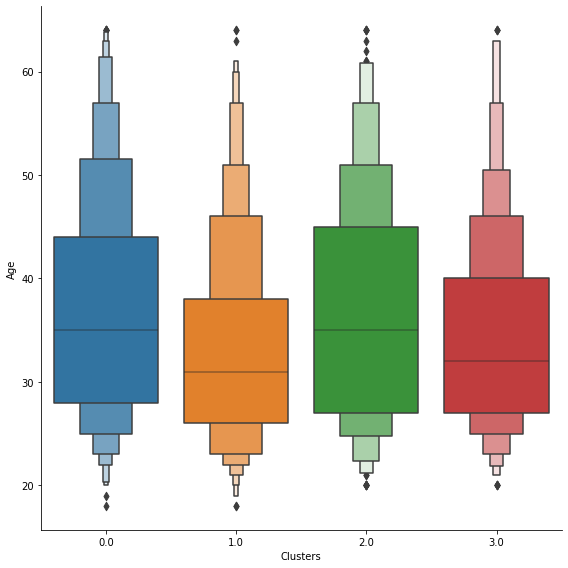

In [ ]:
# Cluster vs Age

plt.figure(figsize = (14, 7))
sns.catplot(y = 'Age', x = 'Clusters', data = df, kind = 'boxen', height = 8);

<Figure size 1008x504 with 0 Axes>

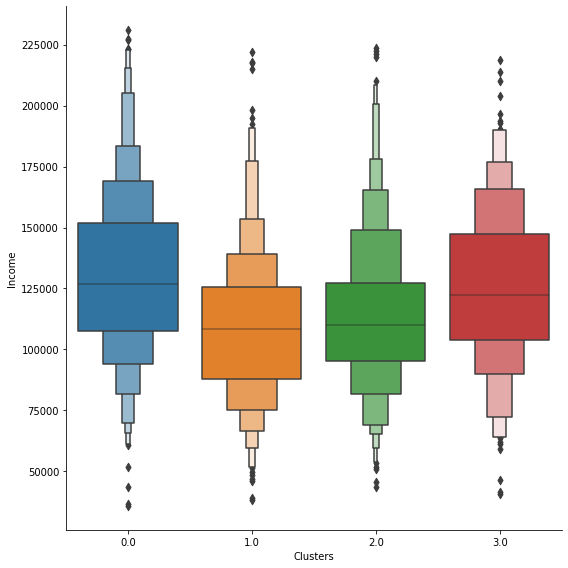

In [ ]:
# Cluster vs Income

plt.figure(figsize = (14, 7))
sns.catplot(y = 'Income', x = 'Clusters', data = data, kind = 'boxen', height = 8);

In [ ]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Clusters
1,1,1,22,1,150773,1,2,1.0
2,0,0,49,1,89210,0,0,0.0
3,0,0,45,1,171565,1,1,0.0
4,0,0,53,1,149031,1,1,1.0
5,0,0,35,1,144848,0,0,0.0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,NaN
1996,1,1,27,1,117744,1,0,NaN
1997,0,0,31,0,86400,0,0,NaN
1998,1,1,24,1,97968,0,0,NaN


In [ ]:
data['Clusters'].value_counts()

2.0    619
0.0    533
1.0    445
3.0    231
Name: Clusters, dtype: int64

In [ ]:
data.isnull().sum()

Sex                 0
Marital status      0
Age                 0
Education           0
Income              0
Occupation          0
Settlement size     0
Clusters           86
dtype: int64

In [ ]:
data.groupby(by = 'Clusters').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Clusters,,,,,,,
0.0,0.281426,0.463415,37.063790,1.048780,130205.879925,0.998124,1.078799
1.0,0.541573,0.514607,34.206742,0.950562,109290.377528,0.649438,0.485393
2.0,0.552504,0.523425,33.163166,0.964459,113772.197092,0.730210,0.618740
3.0,0.411255,0.519481,36.584416,1.116883,124358.463203,0.861472,0.870130


Text(0.5, 0.98, 'Sex vs Occupation')

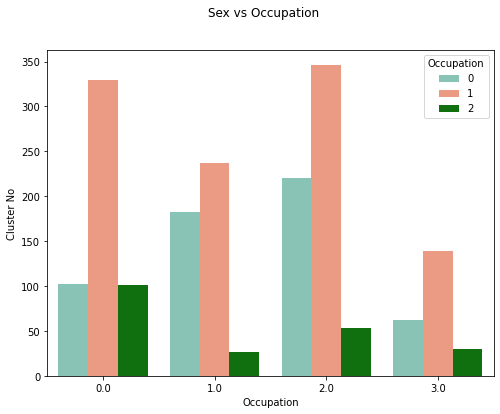

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Clusters", hue="Occupation", data=data,palette= ["#7fcdbb","#fc9272", 'green'],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Cluster No")

fig.suptitle("Sex vs Occupation")

Text(0.5, 0.98, 'Sex vs Occupation')

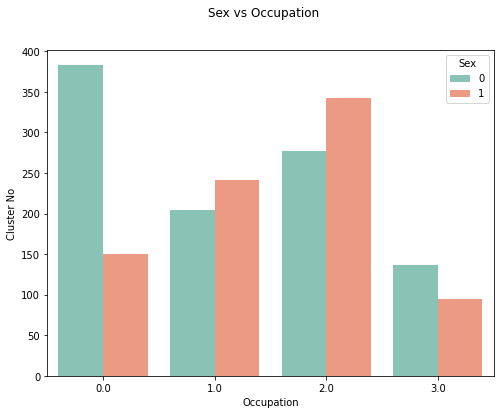

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Clusters", hue="Sex", data=data,palette= ["#7fcdbb","#fc9272"],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Cluster No")

fig.suptitle("Sex vs Occupation")

In [ ]:
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Clusters'],
      dtype='object')

Text(0.5, 0.98, 'Sex vs Occupation')

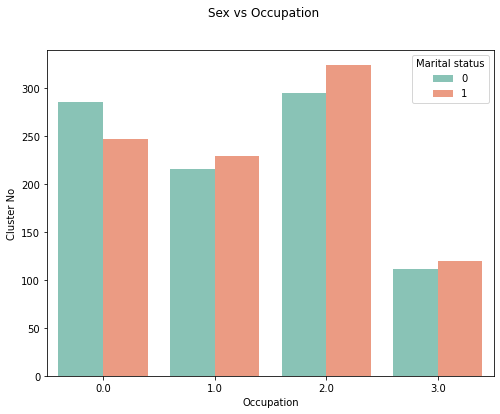

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Clusters", hue="Marital status", data=data,palette= ["#7fcdbb","#fc9272"],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Cluster No")

fig.suptitle("Sex vs Occupation")

Text(0.5, 0.98, 'Sex vs Occupation')

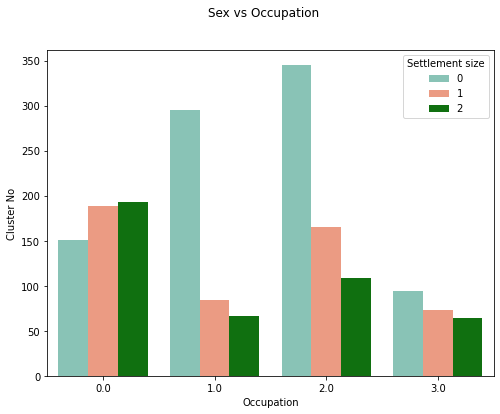

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Clusters", hue="Settlement size", data=data,palette= ["#7fcdbb","#fc9272", 'green'],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Cluster No")

fig.suptitle("Sex vs Occupation")

Text(0.5, 0.98, 'Sex vs Occupation')

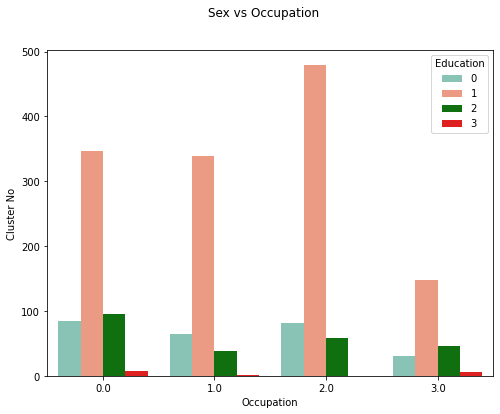

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Clusters", hue="Education", data=data,palette= ["#7fcdbb","#fc9272", 'green', 'red'],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("Cluster No")

fig.suptitle("Sex vs Occupation")

## Hierarichal Clustering

In [52]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [53]:
X_std

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.078291,0.99687,-1.238217,0.011370,1.006763,0.342588,1.585116
1,-0.927393,-1.00314,1.371218,0.011370,-0.870732,-1.264552,-0.888518
2,-0.927393,-1.00314,0.984635,0.011370,1.640860,0.342588,0.348299
3,-0.927393,-1.00314,1.757801,0.011370,0.953637,0.342588,0.348299
4,-0.927393,-1.00314,0.018178,0.011370,0.826068,-1.264552,-0.888518
...,...,...,...,...,...,...,...
1909,1.078291,-1.00314,1.177927,0.011370,0.175777,-1.264552,-0.888518
1910,1.078291,0.99687,-0.754988,0.011370,-0.000527,0.342588,-0.888518
1911,-0.927393,-1.00314,-0.368405,-1.802213,-0.956429,-1.264552,-0.888518
1912,1.078291,0.99687,-1.044925,0.011370,-0.603638,-1.264552,-0.888518


In [55]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [58]:
sil_score = []

for cluster in range(2, 12):
  for linkage_method in ['single', 'complete', 'average', 'ward']:
    agglomerative = AgglomerativeClustering(n_clusters=cluster, affinity= "euclidean", linkage= linkage_method).fit_predict(data_scaled)
    score = silhouette_score(data_scaled, agglomerative, metric = 'euclidean')
    sil_score.append((cluster, linkage_method, score, len(set(agglomerative))))

In [60]:
df_agglomerative = pd.DataFrame(sil_score, columns=['No. of Clusters', 'Linkage Method', 'Score', 'Clusters'])

In [64]:
df_agglomerative.sort_values('Score', ascending = False)

,No. of Clusters,Linkage Method,Score,Clusters
35,10,ward,0.311870,10
39,11,ward,0.308988,11
31,9,ward,0.294700,9
27,8,ward,0.278301,8
11,4,ward,0.261684,4
23,7,ward,0.261502,7
2,2,average,0.260594,2
7,3,ward,0.259464,3
6,3,average,0.245722,3
10,4,average,0.241314,4


In [65]:
hierarichal_ = AgglomerativeClustering(n_clusters=4, linkage = 'ward').fit_predict(data_scaled)

In [66]:
df['Groups of Customers'] = hierarichal_

In [67]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Groups of Customers
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
5,0,0,35,1,144848,0,0,3
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,3
1998,1,1,24,1,97968,0,0,0


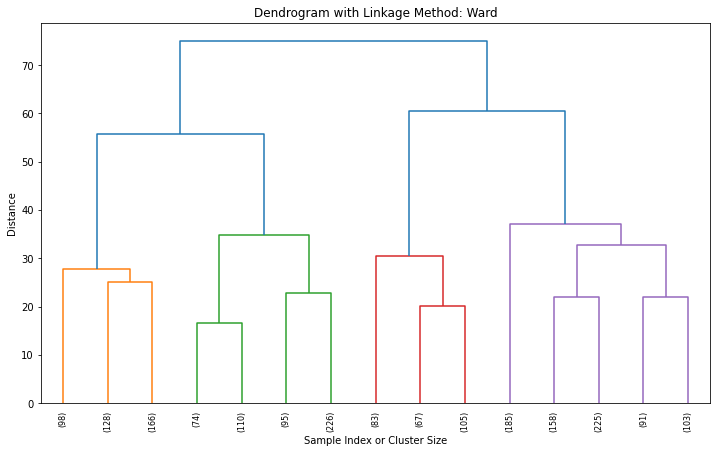

In [69]:
plt.figure(figsize=(12, 7))
plt.title("Dendrogram with Linkage Method: Ward") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(data_scaled, method='ward'), p = 15, truncate_mode = "lastp", leaf_rotation = 90, color_threshold = 40, leaf_font_size = 8) 
plt.show() 

In [70]:
df.groupby(by = 'Groups of Customers').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Groups of Customers,,,,,,,
0,0.744094,1.000000,28.131234,1.000000,110030.619423,0.754593,0.591864
1,0.000000,0.000000,36.344554,0.635644,136994.257426,1.186139,1.396040
2,0.619608,0.776471,51.156863,2.058824,135648.533333,0.803922,0.811765
3,0.408163,0.000000,35.191327,0.750000,96375.706633,0.323980,0.030612


Text(0.5, 0.98, 'Cluster vs Education')

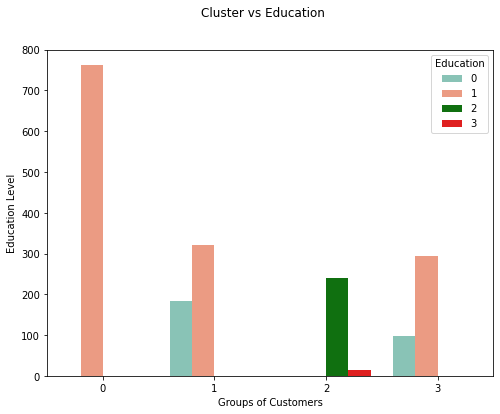

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Groups of Customers", hue="Education", data=df, palette= ["#7fcdbb","#fc9272", 'green', 'red'],ax=ax)
ax.set_xlabel("Groups of Customers")
ax.set_ylabel("Education Level")

fig.suptitle("Cluster vs Education")

Text(0.5, 0.98, 'Cluster vs Occupation')

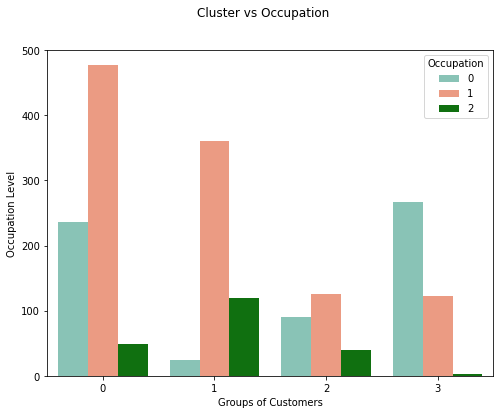

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Groups of Customers", hue="Occupation", data=df, palette= ["#7fcdbb","#fc9272", 'green'],ax=ax)
ax.set_xlabel("Groups of Customers")
ax.set_ylabel("Occupation Level")

fig.suptitle("Cluster vs Occupation")

Text(0.5, 0.98, 'Cluster vs Settlement size')

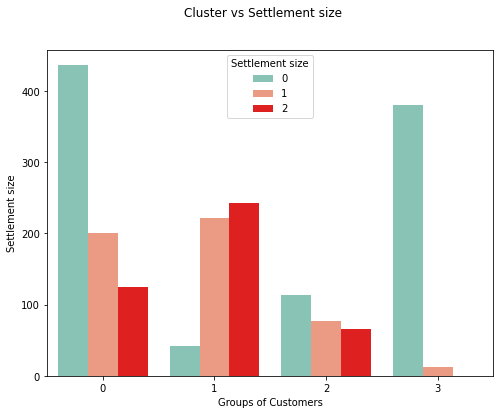

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Groups of Customers", hue="Settlement size", data=df, palette= ["#7fcdbb","#fc9272", 'red'],ax=ax)
ax.set_xlabel("Groups of Customers")
ax.set_ylabel("Settlement size")

fig.suptitle("Cluster vs Settlement size")

## DBSCAN

In [77]:
from sklearn.cluster import DBSCAN

In [84]:
data_scaled

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,1.078291,0.99687,-1.238217,0.011370,1.006763,0.342588,1.585116
1,-0.927393,-1.00314,1.371218,0.011370,-0.870732,-1.264552,-0.888518
2,-0.927393,-1.00314,0.984635,0.011370,1.640860,0.342588,0.348299
3,-0.927393,-1.00314,1.757801,0.011370,0.953637,0.342588,0.348299
4,-0.927393,-1.00314,0.018178,0.011370,0.826068,-1.264552,-0.888518
...,...,...,...,...,...,...,...
1909,1.078291,-1.00314,1.177927,0.011370,0.175777,-1.264552,-0.888518
1910,1.078291,0.99687,-0.754988,0.011370,-0.000527,0.342588,-0.888518
1911,-0.927393,-1.00314,-0.368405,-1.802213,-0.956429,-1.264552,-0.888518
1912,1.078291,0.99687,-1.044925,0.011370,-0.603638,-1.264552,-0.888518


In [115]:
from sklearn.neighbors import NearestNeighbors

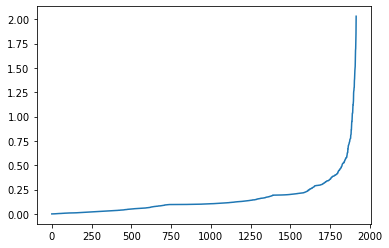

In [161]:
neigh = NearestNeighbors(n_neighbors= 2)
nb = neigh.fit(data_scaled)
dist, indices = nb.kneighbors(data_scaled)
dist = np.sort(dist, axis = 0)
dist = dist[:,1]
plt.plot(dist)

In [120]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.5, min_samples=14)

model_dbs = dbs.fit(data_scaled)
df['DBS_label'] = model_dbs.fit_predict(data_scaled)

In [121]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,DBS_label
1,1,1,22,1,150773,1,2,-1
2,0,0,49,1,89210,0,0,6
3,0,0,45,1,171565,1,1,-1
4,0,0,53,1,149031,1,1,-1
5,0,0,35,1,144848,0,0,-1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-1
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,10
1998,1,1,24,1,97968,0,0,3


In [163]:
df['DBS_label'].unique()

array([-1,  6,  0,  1,  2,  3, 13,  4,  5,  7,  8,  9, 10, 11, 12, 14, 16,
       15, 17, 18, 19, 21, 20, 22])

In [169]:
siliuette_list_dbscan = []

for minpts in range(1,15):
        db = DBSCAN(eps=0.5,min_samples=minpts, metric='euclidean').fit(data_scaled)
        label = db.labels_
        sil_score = silhouette_score(data_scaled, label, metric='euclidean')
        siliuette_list_dbscan.append((sil_score, minpts, len(set(label)) ) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['sil_score', 'minpts', 'number_of_clusters'])

In [170]:
df_dbscan.sort_values('sil_score', ascending = False)

,sil_score,minpts,number_of_clusters
1,0.400624,2,106
2,0.372174,3,70
0,0.366969,1,194
3,0.344270,4,56
4,0.321348,5,47
5,0.294836,6,38
6,0.281512,7,33
7,0.256528,8,32
8,0.244040,9,27
9,0.240236,10,24


In [168]:
df_dbscan

,sil_score,minpts,number_of_clusters
0,0.428844,1,100
1,0.429433,2,76
2,0.410553,3,59
3,0.401013,4,51
4,0.390535,5,46
5,0.380597,6,43
6,0.368856,7,41
7,0.353514,8,36
8,0.345459,9,34
9,0.330689,10,31
